In [8]:
import os
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "serif"


fig_dig = "figures"
os.makedirs(fig_dig, exist_ok=True)

Plotting Beta(50.40, 12.60) for Current
Plotting Beta(12.00, 12.00) for Prior
Plotting Beta(25.64, 13.81) for PropP
Plotting Beta(50.40, 12.60) for Current
Plotting Beta(25.64, 13.81) for PropE
Plotting Beta(50.40, 12.60) for Current
Plotting Beta(12.00, 3.00) for PropV


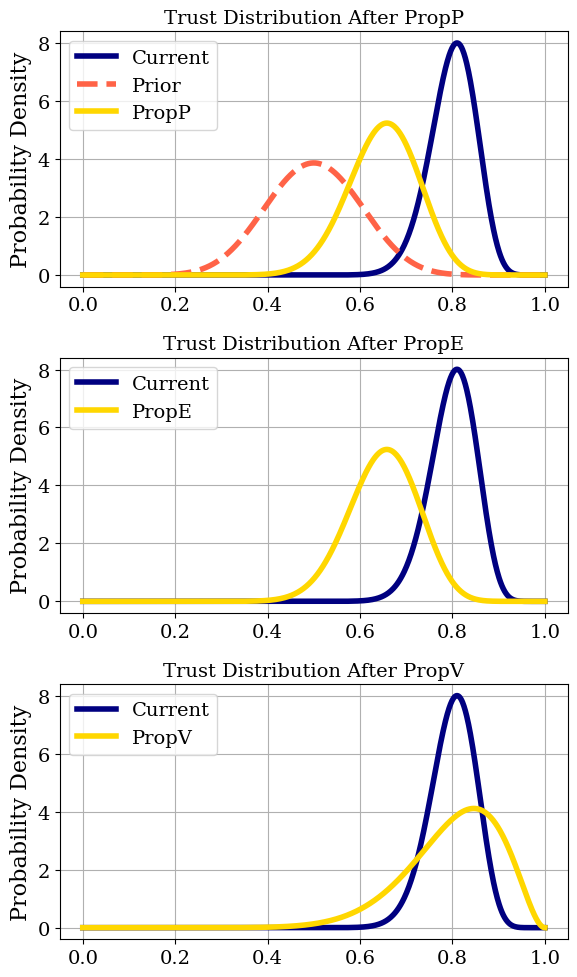

In [9]:
# make figure
fig, axs = plt.subplots(3, 1, figsize=(6,10), sharex=False)

current = {
    "name": "Current",
    "color": "navy",
    "linestyle": "-",
    "mu": 0.8,
    "sigma": 0.05,
}

prior = {
    "name": "Prior",
    "color": "tomato",
    "linestyle": "--",
    "mu": 0.5,
    "sigma": 0.1,
}

propp = {
    "name": "PropP",
    "color": "gold",
    "linestyle": "-",
    "mu": 0.65,
    "sigma": 0.075,
}

prope = {
    "name": "PropE",
    "color": "gold",
    "linestyle": "-",
    "mu": 0.65,
    "sigma": 0.075,
}

propv = {
    "name": "PropV",
    "color": "gold",
    "linestyle": "-",
    "mu": 0.8,
    "sigma": 0.1,
}

# specify all distributions
groups = [[current, prior, propp], [current, prope], [current, propv]]

# plot results
x = np.linspace(0, 1, 1000)
for ax, group in zip(axs, groups):
    for line in group:
        mu = line["mu"]
        var = line["sigma"]**2
        a = (mu * (1-mu) / var - 1) * mu
        b  = (mu * (1-mu) / var - 1) * (1 - mu)
        print(f"Plotting Beta({a:.2f}, {b:.2f}) for {line['name']}")
        y = beta.pdf(x, a, b)
        ax.plot(x, y, label=line["name"], color=line["color"], linewidth=4, linestyle=line["linestyle"])
    ax.grid()
    ax.legend()
    ax.set_ylabel("Probability Density")
    ax.set_title(f"Trust Distribution After {group[-1]['name']}")
plt.tight_layout()
plt.savefig(os.path.join(fig_dig, "trust_propagation.png"))
plt.show()